In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the dataset
df = pd.read_csv('census.csv')

In [19]:
# Display the first few rows to confirm it loaded correctly
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [4]:
# Display basic info about the DataFrame
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SUMLEV                 3193 non-null   int64  
 1   REGION                 3193 non-null   int64  
 2   DIVISION               3193 non-null   int64  
 3   STATE                  3193 non-null   int64  
 4   COUNTY                 3193 non-null   int64  
 5   STNAME                 3193 non-null   object 
 6   CTYNAME                3193 non-null   object 
 7   CENSUS2010POP          3193 non-null   int64  
 8   ESTIMATESBASE2010      3193 non-null   int64  
 9   POPESTIMATE2010        3193 non-null   int64  
 10  POPESTIMATE2011        3193 non-null   int64  
 11  POPESTIMATE2012        3193 non-null   int64  
 12  POPESTIMATE2013        3193 non-null   int64  
 13  POPESTIMATE2014        3193 non-null   int64  
 14  POPESTIMATE2015        3193 non-null  

# Question 1 ; Which state has the most counties in it?

In [5]:
counties_df = df[df['SUMLEV'] == 50]
state_county_counts = counties_df.groupby('STNAME')['CTYNAME'].nunique()
state_with_most_counties = state_county_counts.idxmax()
max_counties = state_county_counts.max()
print(f"The state with the most counties is: {state_with_most_counties}")
print(f"It has {max_counties} counties.")
print("\nTop 5 states by number of counties:")
print(state_county_counts.nlargest(5))

The state with the most counties is: Texas
It has 254 counties.

Top 5 states by number of counties:
STNAME
Texas       254
Georgia     159
Virginia    133
Kentucky    120
Missouri    115
Name: CTYNAME, dtype: int64


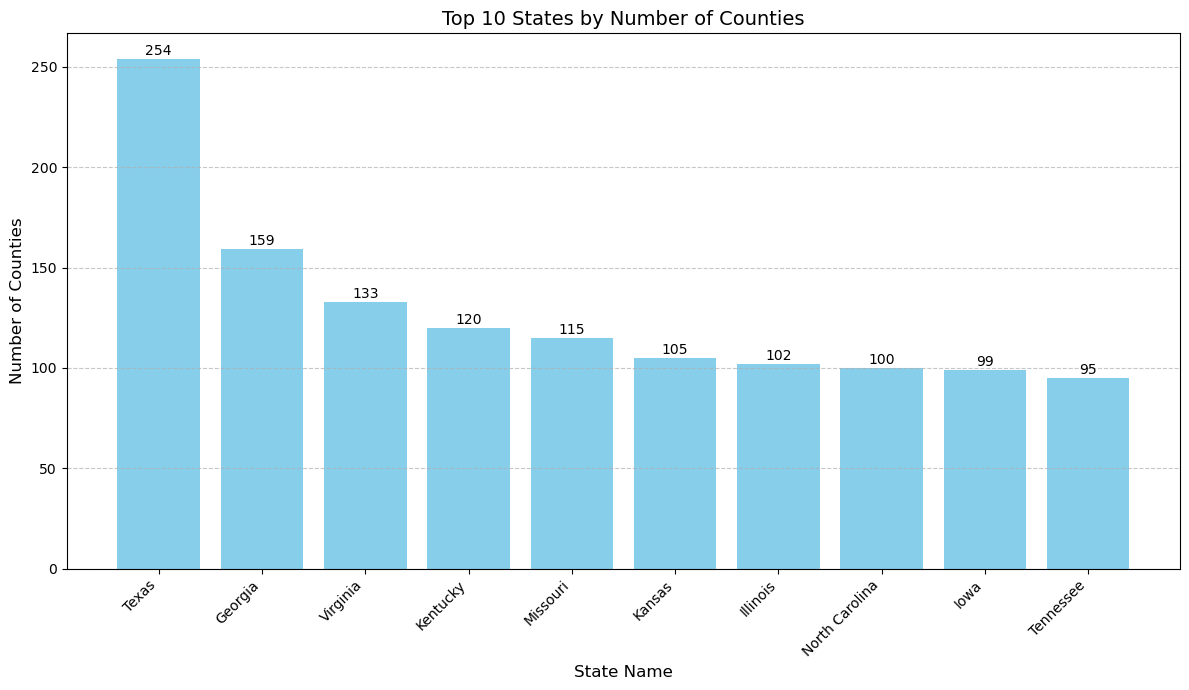

In [6]:
## lets visualise the result
plt.figure(figsize=(12, 7))
top_10_states = state_county_counts.nlargest(10)
bars = plt.bar(top_10_states.index, top_10_states.values, color='skyblue')
plt.xlabel('State Name', fontsize=12)
plt.ylabel('Number of Counties', fontsize=12)
plt.title('Top 10 States by Number of Counties', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Question 2 ; Only looking at the three most populous counties for each state, what are the three most populous states (in order of highest population to lowest population)?

In [14]:
counties_df = df[df['SUMLEV'] == 50]
top_3_counties_per_state = counties_df.groupby('STNAME').apply(
    lambda x: x.nlargest(3, 'CENSUS2010POP')
)
state_pop_from_top_3_counties = top_3_counties_per_state.groupby(level=0)['CENSUS2010POP'].sum()
most_populous_states = state_pop_from_top_3_counties.nlargest(3)
print("The three most populous states (based on their three most populous counties) are:")
print(most_populous_states)

The three most populous states (based on their three most populous counties) are:
STNAME
California    15924150
Texas          8269632
Illinois       6815061
Name: CENSUS2010POP, dtype: int64


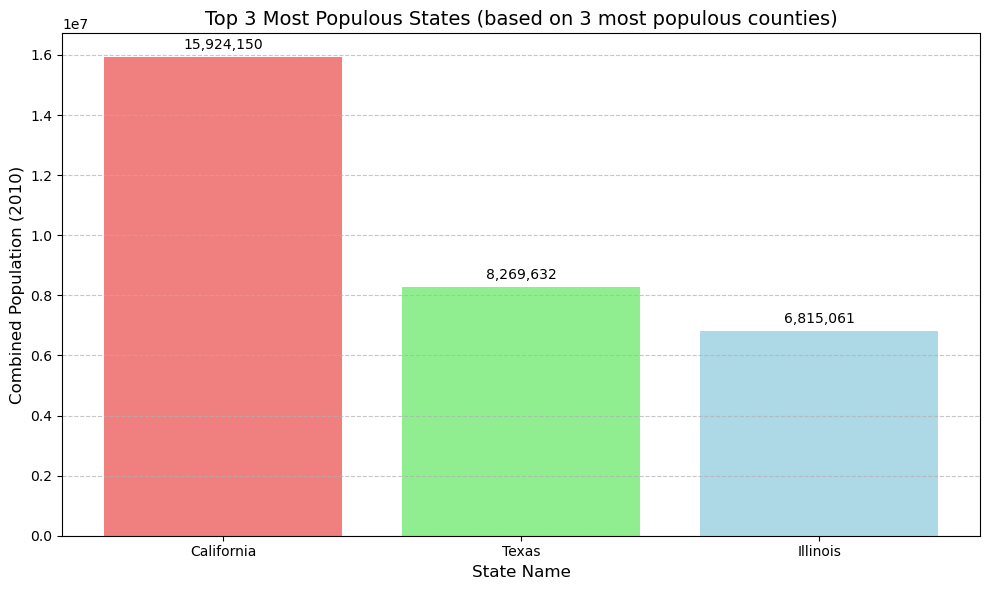

In [8]:
## lets vizualize the result
plt.figure(figsize=(10, 6))
bars = plt.bar(most_populous_states.index, most_populous_states.values, color=['lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel('State Name', fontsize=12)
plt.ylabel('Combined Population (2010)', fontsize=12)
plt.title('Top 3 Most Populous States (based on 3 most populous counties)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (max(most_populous_states.values) * 0.01),
             f'{int(yval):,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

## Question 3 ;Which city has the most counties in it? 

In [9]:
counties_df = df[df['SUMLEV'] == 50]
common_county_names = counties_df['CTYNAME'].value_counts()
most_common_county_name = common_county_names.idxmax()
frequency = common_county_names.max()
print(f"The county name that appears most frequently across states is: {most_common_county_name}")
print(f"It appears {frequency} times.")
print("\nTop 5 most common county names:")
print(common_county_names.nlargest(5))

The county name that appears most frequently across states is: Washington County
It appears 30 times.

Top 5 most common county names:
CTYNAME
Washington County    30
Jefferson County     25
Franklin County      24
Lincoln County       23
Jackson County       23
Name: count, dtype: int64


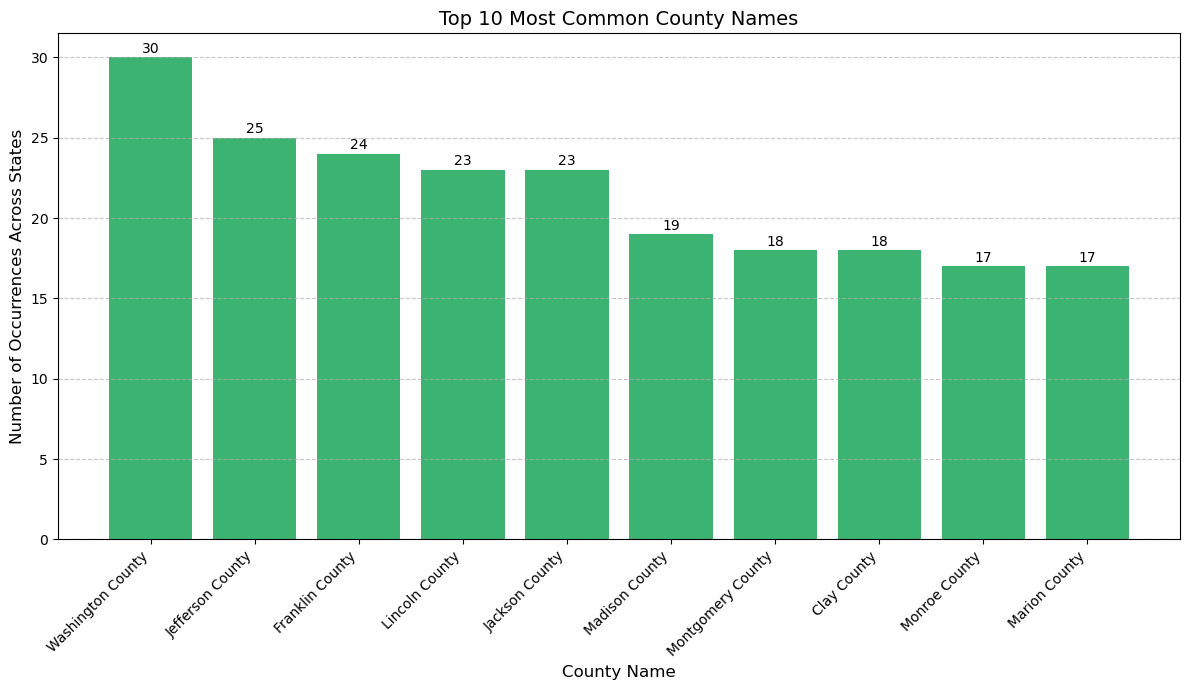

In [10]:
# lets visualize the result
plt.figure(figsize=(12, 7))
top_10_common_counties = common_county_names.nlargest(10)
bars = plt.bar(top_10_common_counties.index, top_10_common_counties.values, color='mediumseagreen')
plt.xlabel('County Name', fontsize=12)
plt.ylabel('Number of Occurrences Across States', fontsize=12)
plt.title('Top 10 Most Common County Names', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [11]:
states_df = df[df['SUMLEV'] == 40]
region_division_counts = states_df.groupby('REGION')['DIVISION'].nunique()
region_names = {
    1: 'Northeast',
    2: 'Midwest',
    3: 'South',
    4: 'West'
}
region_division_counts.index = region_division_counts.index.map(region_names)
region_with_most_divisions = region_division_counts.idxmax()
max_divisions = region_division_counts.max()
print(f"The region with the most divisions is: {region_with_most_divisions}")
print(f"It has {max_divisions} divisions.")
print("\nNumber of divisions per region:")
print(region_division_counts)

The region with the most divisions is: South
It has 3 divisions.

Number of divisions per region:
REGION
Northeast    2
Midwest      2
South        3
West         2
Name: DIVISION, dtype: int64


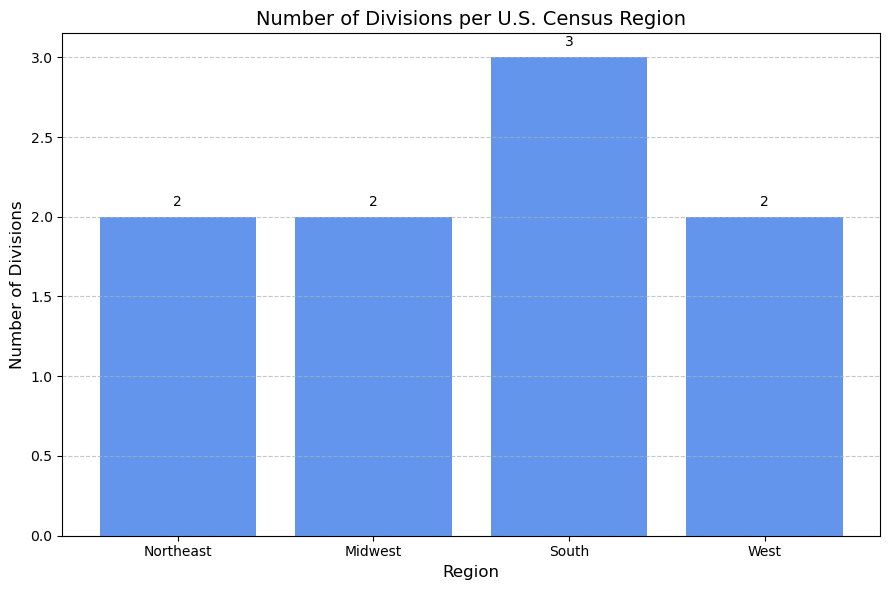

In [15]:
plt.figure(figsize=(9, 6))
bars = plt.bar(region_division_counts.index, region_division_counts.values, color='cornflowerblue')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Divisions', fontsize=12)
plt.title('Number of Divisions per U.S. Census Region', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Census Project Findings
1. Which state has the most counties in it?
Answer: Texas

Details: Texas has 254 counties.


2. Only looking at the three most populous counties for each state, what are the three most populous states (in order of highest population to lowest population)?
Answer:

California: 15,924,150

Texas: 8,269,632

Illinois: 6,815,061


3. Which city has the most counties in it?
Interpretation & Answer: Interpreting "city" as the most common county name string in the dataset, the county name that appears most frequently across states is Washington County.

Details: "Washington County" appears 30 times across different states.


4. Which region has the most divisions in it?
Answer: The South region.

Details: The South region has 3 divisions, while the Northeast, Midwest, and West regions each have 2 divisions.
